In [282]:
%load_ext autoreload
%autoreload 2
import numpy as np
from juno import utils
from pprint import pprint
from juno.juno_custom.elements.Herschel.structures import HerschelSettings
import juno.juno_custom.elements.Herschel.utils as h_utils
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [283]:
config = utils.load_yaml_config(config_filename=r'C:\Users\User\Github\juno\juno\juno_custom\config.yaml')
settings = HerschelSettings.from_dict(config.get('HerschelSettings'))
pprint(settings.__dict__)
pixel_size=0.05

{'a': 0,
 'exponent': 2,
 'magnification': 2,
 'max_iter': 2000,
 'n_lens': 2,
 'n_medium_i': 1,
 'n_medium_o': 1,
 'radii': None,
 'radius': 9,
 'radius_buffer': 0.05,
 'thickness': 15.0,
 'tolerance': 0.1,
 'z_medium_i': 60.0,
 'z_medium_o': -30.0}


In [284]:
settings.calculate_radii(pixel_size=pixel_size)

In [285]:
raw_profiles = h_utils.create_raw_profiles(settings)

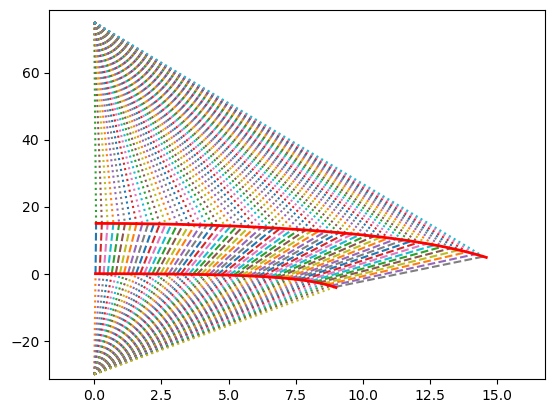

In [286]:
h_utils.display_ray_tracing(settings, raw_profiles, 1.05)

In [287]:
profiles = h_utils.calculate_profiles(settings, raw_profiles, pixel_size)
lenses = h_utils.generate_lenses(settings, profiles)

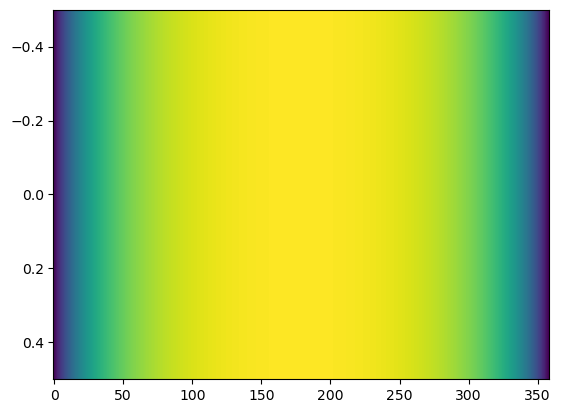

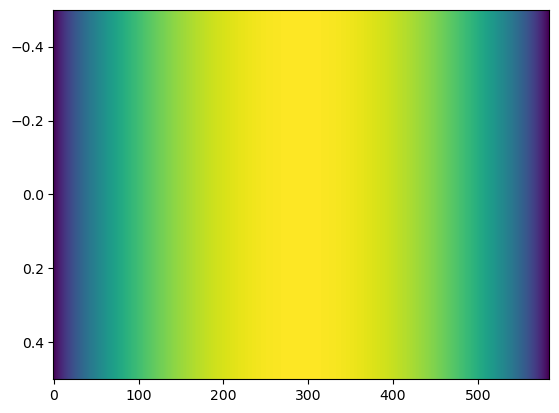

In [288]:
plt.imshow(profiles.y_first, aspect='auto')
plt.show()
plt.imshow(profiles.y_second, aspect='auto')

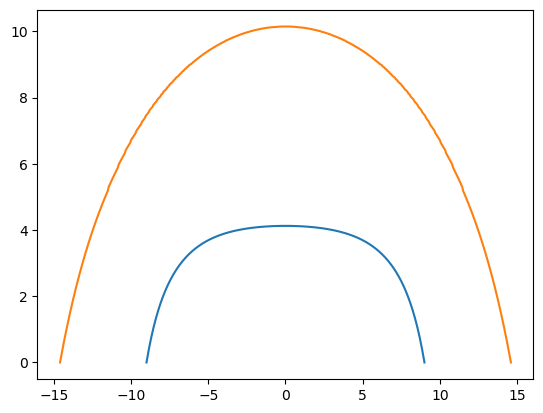

In [289]:
plt.plot(profiles.x_first, profiles.y_first[0, :])
plt.plot(profiles.x_second, profiles.y_second[0, :])

In [290]:
print(lenses.first)

 Lens (diameter: 1.80e+01, height: 4.13e+00, 
exponent: 2.000, refractive_index: 1.000),


In [291]:
print(lenses.first.profile.shape)

(1, 359)


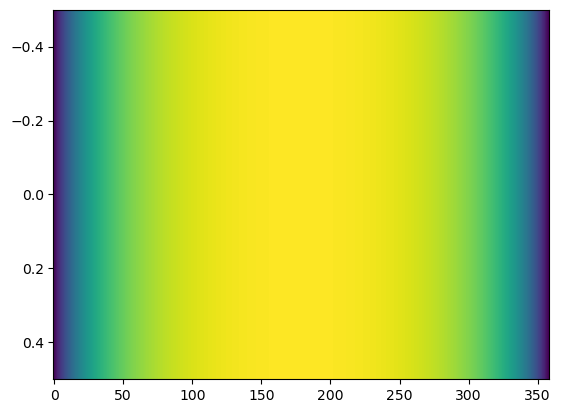

In [292]:
plt.imshow(lenses.first.profile, aspect='auto')

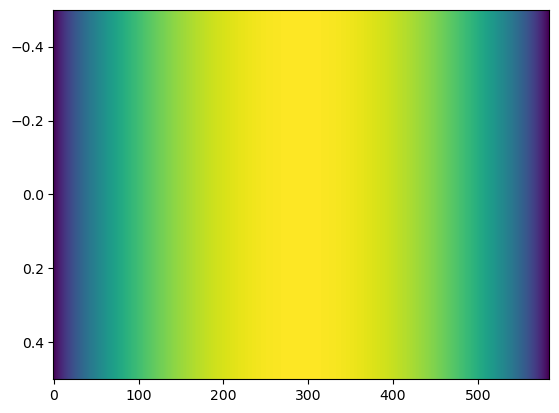

In [293]:
plt.imshow(lenses.second.profile, aspect='auto')

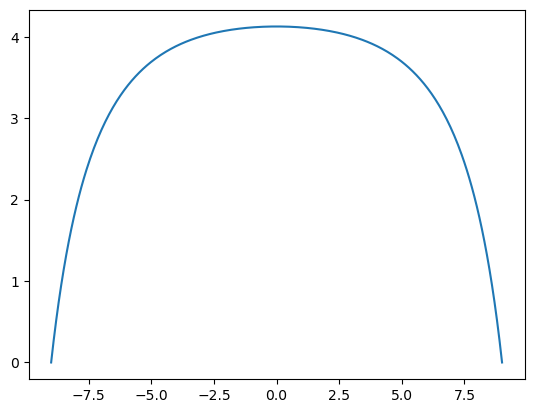

In [294]:
plt.plot(profiles.x_first, lenses.first.profile[0, :])

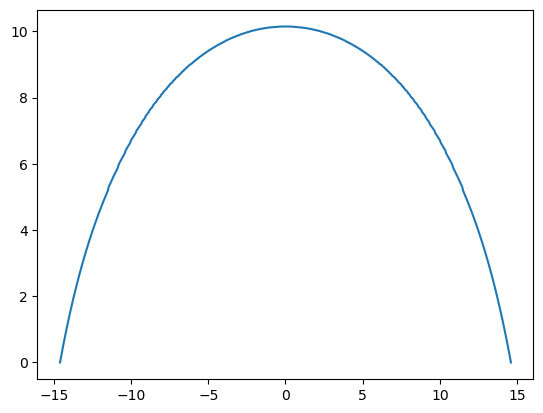

In [295]:
plt.plot(profiles.x_second, lenses.second.profile[0, :])

In [296]:
from juno.Lens import Lens

In [298]:
# save the lens
np.save(r'C:\Users\User\Github\juno\juno\juno_custom\elements\lenses\first.npy', lenses.first.profile)
np.save(r'C:\Users\User\Github\juno\juno\juno_custom\elements\lenses\second.npy', lenses.second.profile)